In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

realtor_data = "Resources/Realtor_Data.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df
# data_types = realtor_file_df.dtypes
# data_types

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0


In [4]:
realtor_file_df.duplicated().sum()

926465

In [5]:
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048521,for_sale,4.0,3.0,0.09,Rosedale,New York,11422.0,NaN,3/18/2002,849990.0
1048539,for_sale,6.0,5.0,0.09,Rosedale,New York,11422.0,2315.0,4/9/2021,1279000.0
1048543,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,2/11/2021,190000.0
1048558,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,NaN,179000.0


In [6]:
nan_df = realtor_file_df.isna().any(axis=1)
nan_df

0           True
1           True
2           True
3           True
4           True
           ...  
1048570    False
1048571     True
1048572     True
1048573     True
1048574     True
Length: 1048575, dtype: bool

In [7]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0,Yes
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0,Yes
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0,Yes
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0,Yes


In [8]:
realtor_file_df.fillna(0,inplace=True)


In [9]:
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1047710,for_sale,1.0,1.0,0.0,New York,New York,10010.0,750.0,6/2/2016,1300000.0,Yes
1047729,for_sale,1.0,1.0,0.0,New York,New York,10025.0,0.0,10/31/2014,625000.0,Yes
1047753,for_sale,3.0,4.0,0.0,New York,New York,10016.0,2880.0,5/19/2017,5750000.0,Yes
1047842,for_sale,2.0,1.0,0.0,New York,New York,11368.0,0.0,1/10/2018,182000.0,Yes


In [10]:
clean_df= new_york_df.describe().round(2)
clean_df

,bed,bath,acre_lot,zip_code,house_size,price
count,52742.00,52742.00,52742.00,52742.00,52742.00,5.274200e+04
mean,1.92,2.05,0.00,10134.47,947.69,2.616878e+06
std,1.60,1.54,0.01,344.30,1582.60,4.566627e+06
min,0.00,0.00,0.00,0.00,0.00,0.000000e+00
25%,1.00,1.00,0.00,10016.00,0.00,6.985000e+05
50%,2.00,2.00,0.00,10023.00,638.00,1.280000e+06
75%,3.00,3.00,0.00,10036.00,1318.00,2.750000e+06
max,40.00,45.00,0.36,11697.00,61839.00,1.350000e+08


In [9]:
clean_df.corr()

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,1.000000,1.000000,0.960445,0.582387,-0.156262
bath,1.000000,1.000000,1.000000,0.960455,0.582463,-0.156170
acre_lot,1.000000,1.000000,1.000000,0.960363,0.581805,-0.156968
zip_code,0.960445,0.960455,0.960363,1.000000,0.642844,-0.049328
house_size,0.582387,0.582463,0.581805,0.642844,1.000000,0.711886
price,-0.156262,-0.156170,-0.156968,-0.049328,0.711886,1.000000


<Axes: >

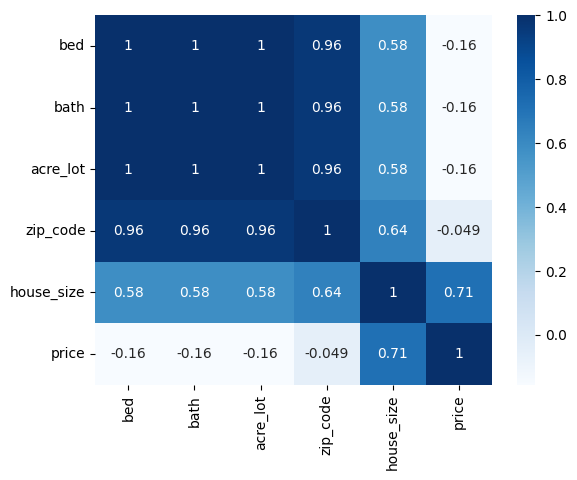

In [10]:
sns.heatmap(clean_df.corr(), annot=True, cmap="Blues")

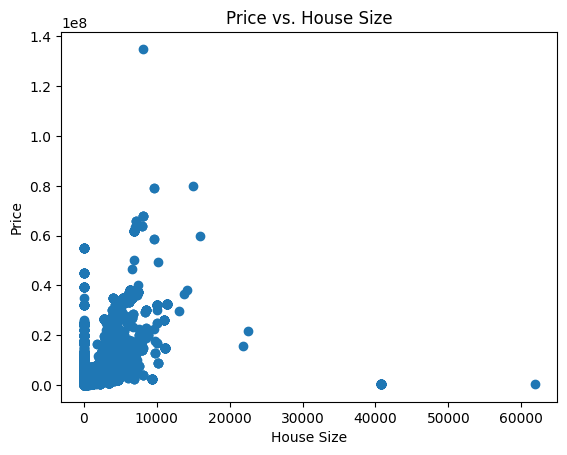

In [11]:
plt.scatter(new_york_df['house_size'], new_york_df['price'])
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('Price vs. House Size')
plt.show()

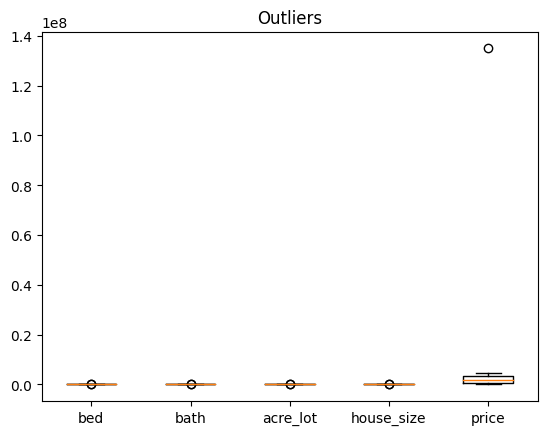

In [33]:
x_axis=['bed','bath','acre_lot','house_size','price']


plt.boxplot(clean_df[x_axis])
plt.xticks([1, 2, 3, 4, 5], x_axis)
plt.title('Outliers')
plt.show()

In [53]:
mean_numpy = round(np.mean(new_york_df["price"]),2)
print(f"The mean price in NY is {mean_numpy}")

median_numpy = round(np.median(new_york_df["price"]),2)
print(f"The median price in NY is {median_numpy}")

mode_scipy = st.mode(new_york_df["price"])
print(f"The mode price in NY is {mode_scipy}")

The mean price in NY is 2612111.87
The median price in NY is 1265000.0
The mode price in NY is ModeResult(mode=array([995000.]), count=array([681]))


C:\Users\agonz\AppData\Local\Temp\ipykernel_20324\4116251036.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_scipy = st.mode(new_york_df["price"])


In [58]:
print(st.normaltest(new_york_df["price"].sample(10000)))

NormaltestResult(statistic=11152.826766119626, pvalue=0.0)


In [47]:
var_numpy = np.var(new_york_df["price"],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(new_york_df["price"],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 20964716425480.35
The population standard deviation using the NumPy module is 4578724.322939781


In [49]:
z_scipy = st.zscore(new_york_df["price"])
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 465089    -0.311683
465111     5.980462
465513    -0.375020
465515    -0.355364
465516    -0.393584
             ...   
1117009   -0.537729
1117465   -0.171797
1117972   -0.494048
1118260   -0.354272
1398091   -0.544499
Name: price, Length: 55543, dtype: float64


In [52]:
quartiles = new_york_df["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 695000.0
The upper quartile of price is: 2725000.0
The interquartile range of price is: 2030000.0
The the median of price is: 1265000.0 
Values below -2350000.0 could be outliers.
Values above 5770000.0 could be outliers.


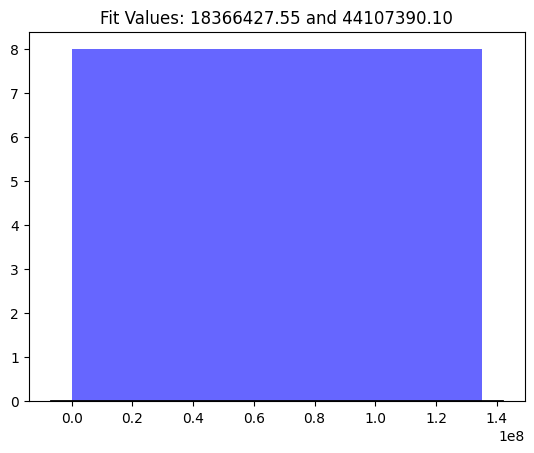

In [71]:
plt.hist(clean_df["price"], bins=1, alpha=0.6, color='b')
 
# Plot the PDF.
mu, std = st.norm.fit(clean_df["price"]) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, std)
 
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
 
plt.show()

#prolly wont use this at all. oh whale

In [12]:
new_york_df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes


In [11]:
new_york_df.bed.unique()

array([ 2., 12.,  1.,  3.,  4.,  0.,  5.,  7., 11.,  6., 10., 13.,  8.,
        9., 17., 14., 24., 40., 35.])

In [12]:
new_york_df.bath.unique()

array([ 2., 14.,  1.,  5.,  3.,  4.,  6., 11.,  7.,  9., 10., 12.,  0.,
        8., 17., 16., 19., 13., 15., 24., 45.])

In [64]:
new_york_df2 = new_york_df.copy()

In [65]:
new_york_df2["bed-bath"] = new_york_df2.bed.astype(int).astype(str) + "-" + new_york_df2.bath.astype(int).astype(str)

In [66]:
new_york_df2.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded,bed-bath
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No,2-2
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No,12-14
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No,2-2
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes,1-2
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes,1-1


In [67]:
df = new_york_df2[["bed-bath","price"]].groupby("bed-bath",as_index=False).agg({"price":["mean","count"]}) 
df

bed-bath         price      
                     mean count
0       0-0  2.637070e+06   297
1       0-1  5.806713e+05  6503
2       0-2  1.391777e+06   233
3       0-3  4.541727e+06    11
4       0-4  4.233167e+06     6
..      ...           ...   ...
84     9-13  8.000000e+07     1
85      9-4  3.950000e+06    35
86      9-5  5.697500e+06    10
87      9-6  3.995000e+06     4
88      9-9  2.999500e+07     1

[89 rows x 3 columns]

In [18]:
df.columns = ["bed-bath", "avg_price", "count"]
df

,bed-bath,avg_price,count
0,0-0,2.637070e+06,297
1,0-1,5.806713e+05,6503
2,0-2,1.391777e+06,233
3,0-3,4.541727e+06,11
4,0-4,4.233167e+06,6
...,...,...,...
84,9-13,8.000000e+07,1
85,9-4,3.950000e+06,35
86,9-5,5.697500e+06,10
87,9-6,3.995000e+06,4


In [19]:
df = df.sort_values(by='count', ascending=False)
df = df.head(10)
df

,bed-bath,avg_price,count
8,1-1,8.643891e+05,14342
25,2-2,1.876714e+06,8956
1,0-1,5.806713e+05,6503
24,2-1,8.814939e+05,3321
32,3-3,3.813602e+06,3068
26,2-3,3.670254e+06,2554
31,3-2,2.112105e+06,2392
9,1-2,1.537241e+06,2262
33,3-4,6.632459e+06,1942
41,4-4,6.383738e+06,1170


In [20]:
df['Cumulative Percentage'] = df['count'].cumsum() / df['count'].sum() * 100
df

,bed-bath,avg_price,count,Cumulative Percentage
8,1-1,8.643891e+05,14342,30.836379
25,2-2,1.876714e+06,8956,50.092453
1,0-1,5.806713e+05,6503,64.074393
24,2-1,8.814939e+05,3321,71.214793
32,3-3,3.813602e+06,3068,77.811223
26,2-3,3.670254e+06,2554,83.302516
31,3-2,2.112105e+06,2392,88.445496
9,1-2,1.537241e+06,2262,93.308966
33,3-4,6.632459e+06,1942,97.484412
41,4-4,6.383738e+06,1170,100.000000


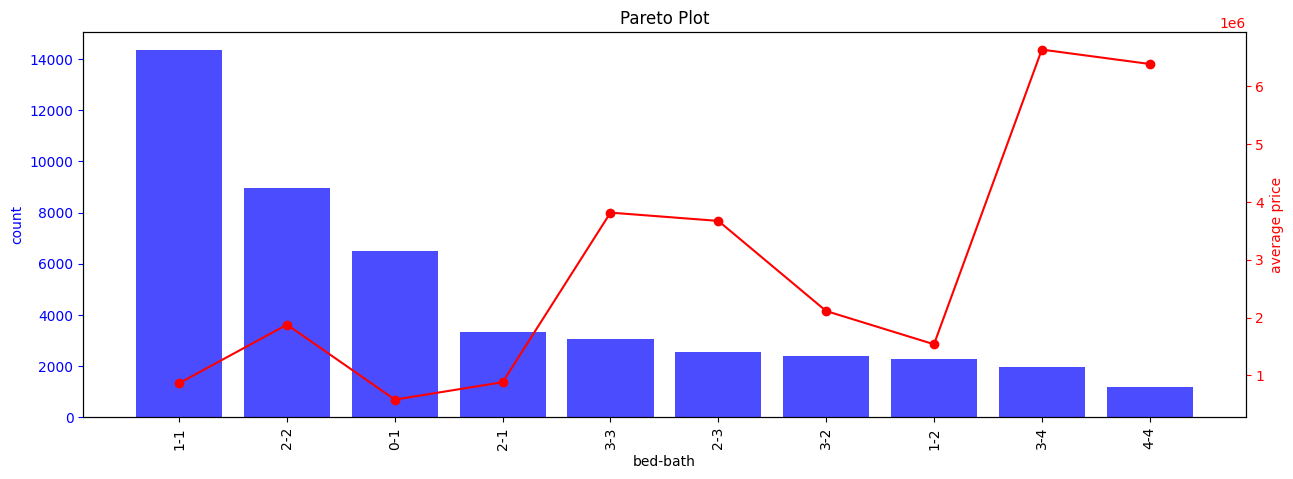

In [21]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(df['bed-bath'], df['count'], color='b', alpha=0.7, label='count')
ax1.set_xlabel('bed-bath')
ax1.set_ylabel('count', color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation="vertical")

ax2 = ax1.twinx()
ax2.plot(df['bed-bath'], df['avg_price'], color='r', marker='o', label='avg price')
ax2.set_ylabel('average price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Plot')
plt.show()

## DISTRUBTION TABLES FOR NEY YORK CITY 

In [22]:
# Build DataFrame Bed v Count
bed_count_df = new_york_df2[["bed","price"]].groupby("bed",as_index=False).agg({"price":["mean","count"]}) 

bed_count_df


bed         price       
                  mean  count
0    0.0  7.126910e+05   7080
1    1.0  9.553558e+05  16648
2    2.0  1.989066e+06  14961
3    3.0  4.074879e+06   7896
4    4.0  7.302156e+06   3362
5    5.0  1.191074e+07   1319
6    6.0  9.197757e+06    789
7    7.0  1.127644e+07    285
8    8.0  9.623104e+06    198
9    9.0  7.438889e+06     54
10  10.0  7.934839e+06     31
11  11.0  1.248000e+07     39
12  12.0  1.651214e+07     21
13  13.0  8.500000e+06     23
14  14.0  1.690000e+07      2
15  17.0  3.950000e+06      1
16  24.0  2.390000e+07     31
17  35.0  2.150000e+07      1
18  40.0  2.200000e+07      1

In [23]:
bed_count_df.columns = ["bed", "avg_price", "count"]
bed_cpunt_df = bed_count_df.sort_values(by='bed', ascending=False)
bed_count_df

,bed,avg_price,count
0,0.0,7.126910e+05,7080
1,1.0,9.553558e+05,16648
2,2.0,1.989066e+06,14961
3,3.0,4.074879e+06,7896
4,4.0,7.302156e+06,3362
5,5.0,1.191074e+07,1319
6,6.0,9.197757e+06,789
7,7.0,1.127644e+07,285
8,8.0,9.623104e+06,198
9,9.0,7.438889e+06,54


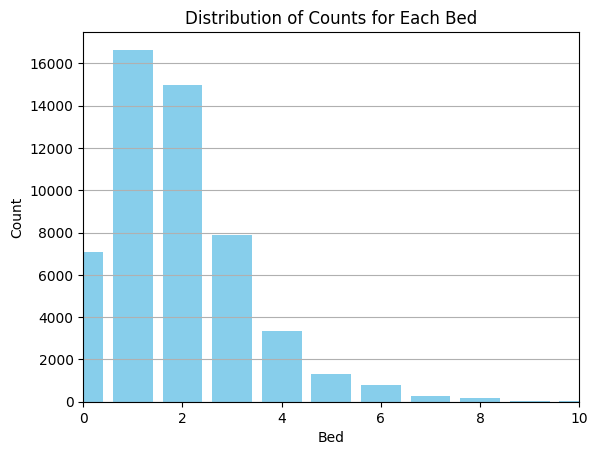

In [24]:
plt.bar(bed_count_df['bed'], bed_count_df['count'], color='skyblue')
plt.xlabel('Bed')
plt.ylabel('Count')
plt.title('Distribution of Counts for Each Bed')
plt.xlim(0, 10)
plt.grid(axis='y')  # Adding grid lines for better readability
plt.show()

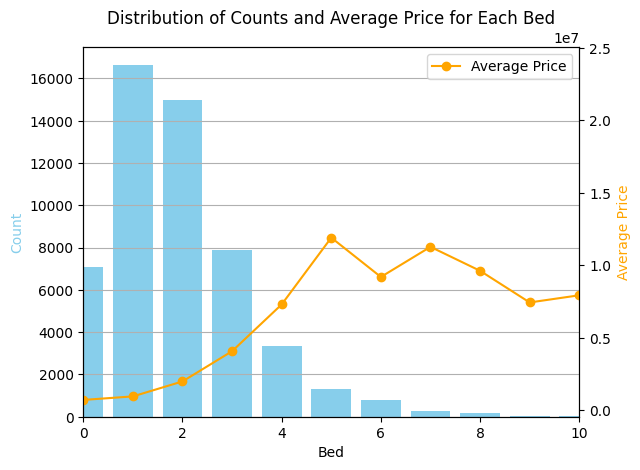

In [25]:

# Assuming bed_count_df is your DataFrame
fig, ax1 = plt.subplots()

# Create bar plot for count
ax1.bar(bed_count_df['bed'], bed_count_df['count'], color='skyblue')
ax1.set_xlabel('Bed')
ax1.set_ylabel('Count', color='skyblue')
ax1.set_title('Distribution of Counts and Average Price for Each Bed')
ax1.set_xlim(0, 10)

# Add grid lines for count plot
ax1.grid(axis='y')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line graph for avg_price
ax2.plot(bed_count_df['bed'], bed_count_df['avg_price'], color='orange', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='orange')

# Show legend for line plot
ax2.legend(loc='upper right')

plt.show()

In [26]:
# Build DataFrame Bed v Count
bath_count_df = new_york_df2[["bath","price"]].groupby("bath",as_index=False).agg({"price":["mean","count"]}) 


In [27]:
#Naming Columns, and sorting by Bath values 
bed_count_df.columns = ["bath", "avg_price", "count"]
bed_count_df = bed_count_df.sort_values(by='bath', ascending=False)

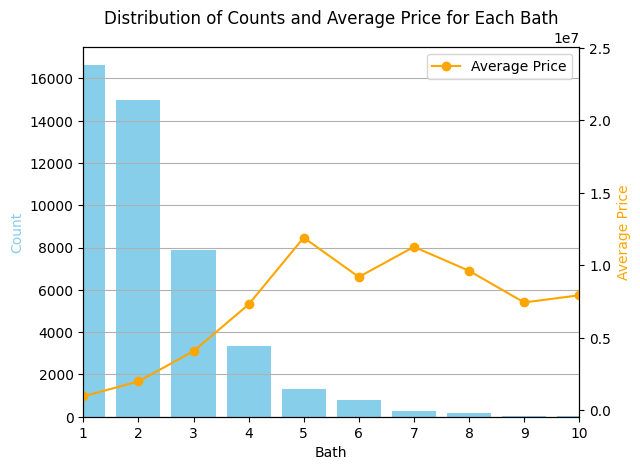

In [86]:
# Assuming bed_count_df is your DataFrame
fig, ax1 = plt.subplots()

# Create bar plot for count
ax1.bar(bed_count_df['bath'], bed_count_df['count'], color='skyblue')
ax1.set_xlabel('Bath')
ax1.set_ylabel('Count', color='skyblue')
ax1.set_title('Distribution of Counts and Average Price for Each Bath')
ax1.set_xlim(1, 10)

# Add grid lines for count plot
ax1.grid(axis='y')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line graph for avg_price
ax2.plot(bed_count_df['bath'], bed_count_df['avg_price'], color='orange', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='orange')

# Show legend for line plot
ax2.legend(loc='upper right')

plt.show()

In [59]:
# Build DataFrame Bed v Count
house_count_df = new_york_df2[["house_size","price"]].groupby("house_size",as_index=False).agg({"price":["mean","count"]}) 
house_count_df

house_size         price       
                         mean  count
0           0.0  1.856163e+06  22255
1         199.0  1.990000e+05      1
2         289.0  3.600000e+05     21
3         300.0  4.131636e+05     11
4         325.0  2.850000e+05      4
...         ...           ...    ...
1497    15875.0  6.000000e+07      1
1498    21816.0  1.550000e+07      1
1499    22455.0  2.150000e+07      1
1500    40720.0  3.890000e+05     24
1501    61839.0  3.480000e+05      1

[1502 rows x 3 columns]

In [69]:
import numpy as np

# Calculate the group number for every 500 sq ft
new_york_df2['group'] = np.ceil(new_york_df2['house_size'] / 500)

# Convert group numbers to integers
new_york_df2['group'] = new_york_df2['group'].astype(int)

# Print the updated DataFrame
new_york_df2

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded,bed-bath,group
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No,2-2,0
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No,12-14,18
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No,2-2,3
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes,1-2,3
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes,1-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047710,for_sale,1.0,1.0,0.0,New York,New York,10010.0,750.0,6/2/2016,1300000.0,Yes,1-1,2
1047729,for_sale,1.0,1.0,0.0,New York,New York,10025.0,0.0,10/31/2014,625000.0,Yes,1-1,0
1047753,for_sale,3.0,4.0,0.0,New York,New York,10016.0,2880.0,5/19/2017,5750000.0,Yes,3-4,6
1047842,for_sale,2.0,1.0,0.0,New York,New York,11368.0,0.0,1/10/2018,182000.0,Yes,2-1,0


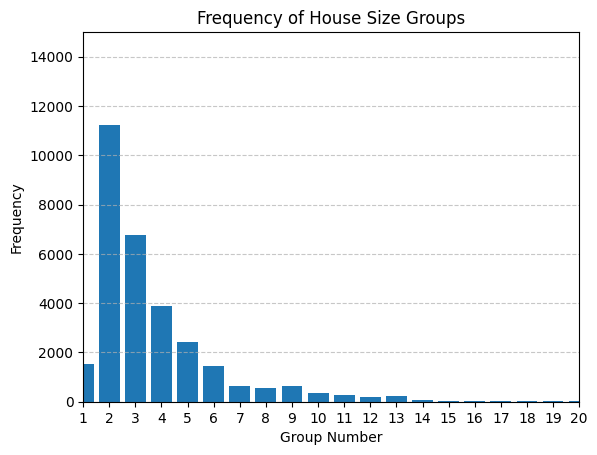

In [85]:
# Count the occurrences of each group
group_counts = new_york_df2['group'].value_counts()

# Sort the group counts by the index (group number) for better visualization
group_counts = group_counts.sort_index()

# Plot the bar graph
plt.bar(group_counts.index, group_counts.values)

# Add labels and title
plt.xlabel('Group Number')
plt.ylabel('Frequency')
plt.title('Frequency of House Size Groups')

# Set xlim
plt.xlim(1, 20)

# Set xticks to be incremented by one
plt.xticks(range(1, 21))

# Set ylim
plt.ylim(0, 15000)

# Set yticks to be incremented by 2000
plt.yticks(range(0, 15001, 2000))

# Add grid for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

